<a href="https://colab.research.google.com/github/SagnikAdak/sagnik2/blob/main/Sales%20prediction%20for%20marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**SALES PREDICTION ON ADVIRTISING DATASET**

> Creating a model to forecast sales based on the marketing expenditure


**Import libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**Load Data**

In [11]:
path="/content/Advertising.csv"
p=pd.read_csv(path)

**Exploring the dataset**

In [12]:
p.head(10)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


In [13]:
p.tail(10)

,Unnamed: 0,TV,Radio,Newspaper,Sales
190,191,39.5,41.1,5.8,10.8
191,192,75.5,10.8,6.0,9.9
192,193,17.2,4.1,31.6,5.9
193,194,166.8,42.0,3.6,19.6
194,195,149.7,35.6,6.0,17.3
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [15]:
p.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000



> Here is number of non-null values, mean values of all items, variation, minimum values,three quartile values and the maximum values

In [16]:
print(p.columns)

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')


In [17]:
p.shape

(200, 5)



> Total number of row and columns (shape of the dataframe)



In [18]:
p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [19]:
#statistical summary
numerical_summary = p.describe().transpose()
palette = sns.color_palette("coolwarm", as_cmap=True)
numerical_summary.style.background_gradient(cmap=palette)

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,200.000000,100.500000,57.879185,1.000000,50.750000,100.500000,150.250000,200.000000
TV,200.000000,147.042500,85.854236,0.700000,74.375000,149.750000,218.825000,296.400000
Radio,200.000000,23.264000,14.846809,0.000000,9.975000,22.900000,36.525000,49.600000
Newspaper,200.000000,30.554000,21.778621,0.300000,12.750000,25.750000,45.100000,114.000000
Sales,200.000000,14.022500,5.217457,1.600000,10.375000,12.900000,17.400000,27.000000


**Data cleaning**

> checkig duplicate values, null values



In [20]:
p.duplicated().sum()

0

In [21]:
p.isnull().sum()

,0
Unnamed: 0,0
TV,0
Radio,0
Newspaper,0
Sales,0


**EDA and data visualization**

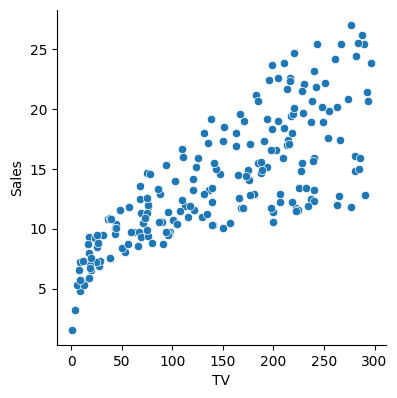

In [23]:
sns.pairplot(p, x_vars=['TV'], y_vars='Sales', size = 4, aspect = 1, kind='scatter')

Text(0.5, 1.02, 'Pairplot of Advertising Spend vs Sales')

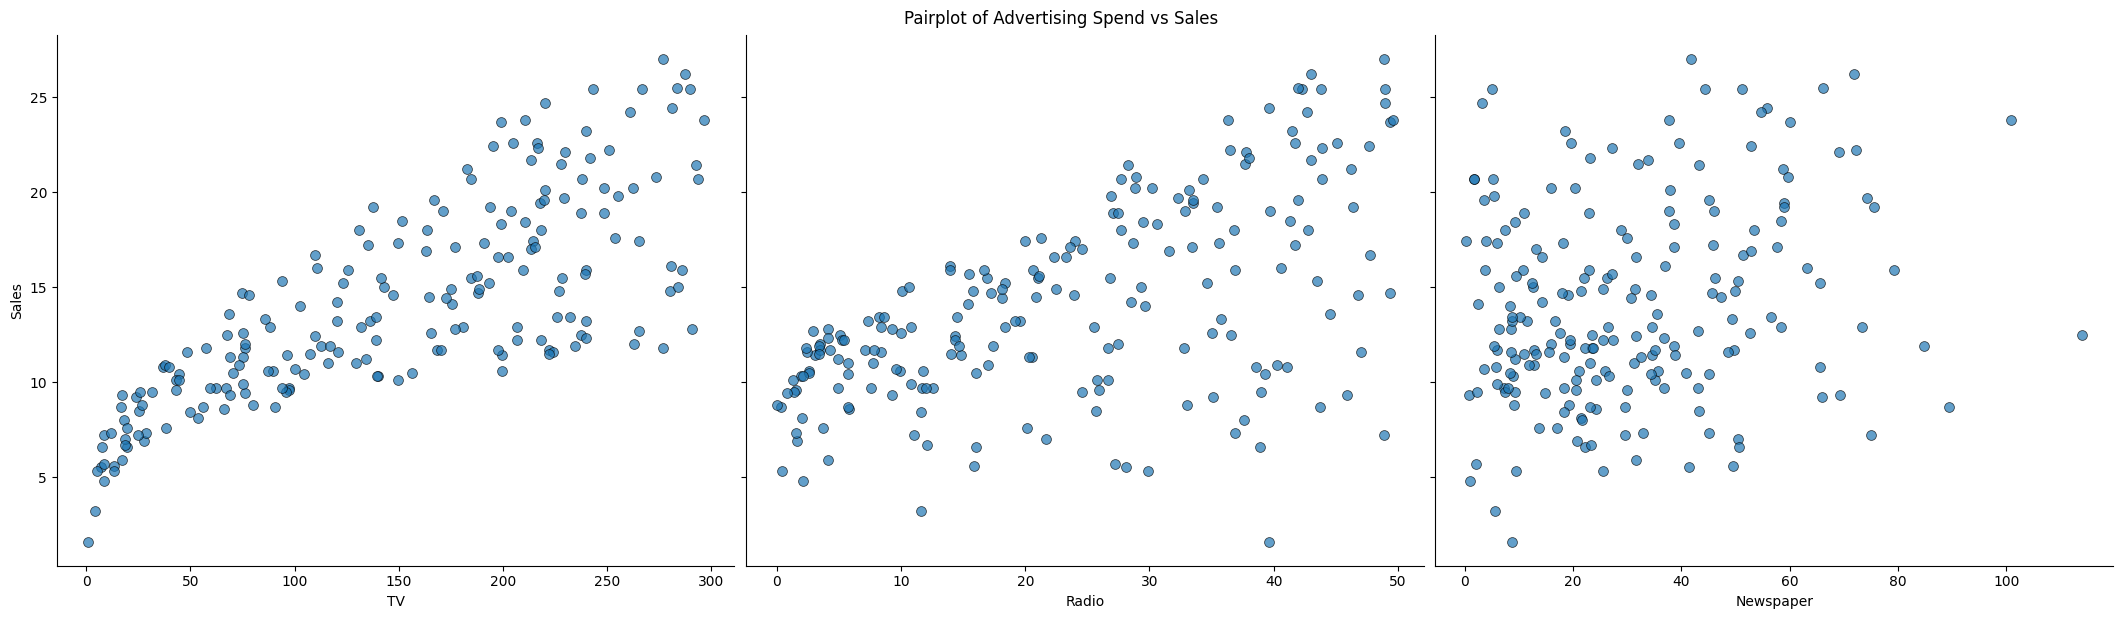

In [24]:
# kde : Kernel Density Estimate on the diagonal
# plot_kws:  Customizing scatter plot appearance
sns.pairplot(p, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', size = 6, aspect = 1.2, kind='scatter',
             plot_kws={'alpha':0.7, 's':50, 'edgecolor':'k'}, diag_kind='kde',
             palette={'TV': 'red', 'Radio': 'blue', 'Newspaper': 'green'},
             diag_kws={'color':'blue', 'shade':True} # Customizing diagonal plots
)
# Adding title
plt.suptitle('Pairplot of Advertising Spend vs Sales', y=1.02)

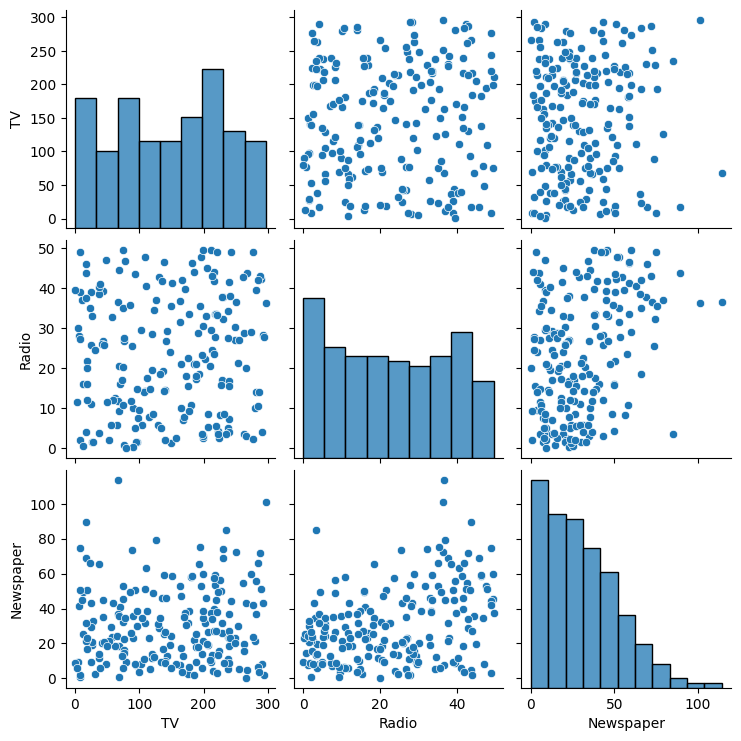

In [25]:
sns.pairplot(p[['TV','Radio','Newspaper']])



> A scatter plots (pairwise plots) to visualize the relationships between variables in a DataFrame.



<Axes: >

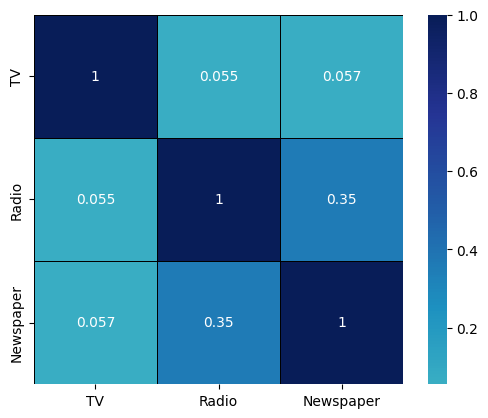

In [26]:
sns.heatmap(p[['TV','Radio','Newspaper']].corr(), annot = True, cmap='YlGnBu',  # Colormap for heatmap
    center=0,  # Center the colormap at zero
    square=True,  # Ensure the heatmap is square
    linewidths=0.5,  # Width of lines that divide cells
    linecolor='black')  # Color of lines that divide cells





*   correlation between variavles








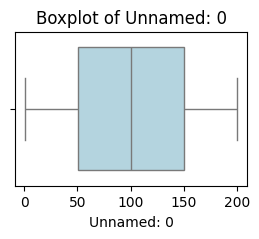

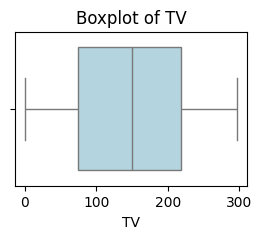

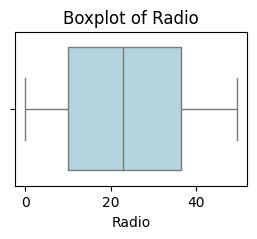

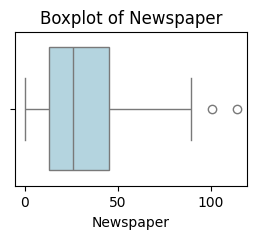

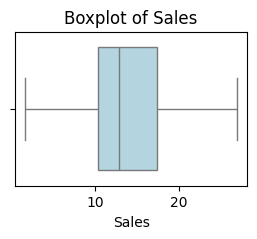

In [27]:
numerical_columns = p.select_dtypes(include=['number']).columns
for column in numerical_columns:
    plt.figure(figsize=(3,2))
    sns.boxplot(x=p[column], color='lightblue')
    plt.title(f'Boxplot of {column}')
    plt.show()

**Test Train Analysis**

In [28]:
x= p["TV"]
y=p["Sales"]

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, train_size=0.8,  test_size=0.2, random_state=100)

In [30]:
X_train.head()

,TV
168,215.4
112,175.7
171,164.5
181,218.5
7,120.2


In [31]:
Y_train.head()

,Sales
168,17.1
112,14.1
171,14.5
181,12.2
7,13.2


In [32]:
import statsmodels.api as sm
# Adding constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fit the resgression line using 'OLS'
lr = sm.OLS(Y_train, X_train_sm).fit()

# Print the intercept and the slope of the regression line
lr.params

,0
const,7.113008
TV,0.046110


In [33]:
# Summary operation lists out all the different parameters of the regression line
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     257.5
Date:                Sun, 08 Sep 2024   Prob (F-statistic):           5.36e-35
Time:                        08:29:22   Log-Likelihood:                -417.09
No. Observations:                 160   AIC:                             838.2
Df Residuals:                     158   BIC:                             844.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.1130      0.492     14.469      0.0



> Getting a look at some significant figures from the overview
The significance of the R-squared F statistic and its coefficients (p-values)
1. TV has a very low p value of 0.046110 for its coefficient.
There is statistical significance in the coefficient. Hence, the relationship is not coincidental.
R squared equals to 0.620.
indicating that TV accounts for 62% of the variation in sales.
This R-squared score is acceptable.
3. The value of p for the F statistic is very low—practically low.
indicating that the explained variance is not solely due to chance and that the model fit is statistically significant.
Fit is important. Let's see how well the data fit the model.
Our linear regression equation appears as follows based on the parameters we obtain: Sales=7.113008 + 0.046110×TV




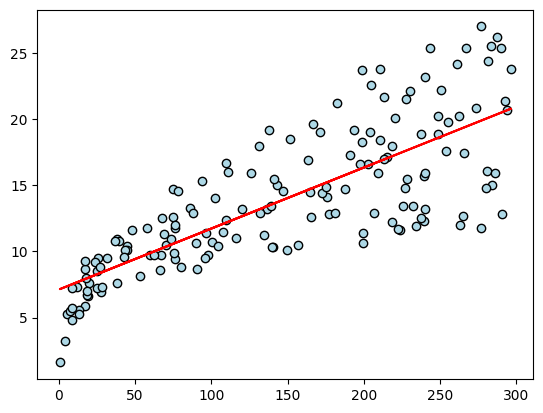

In [34]:
plt.scatter(X_train, Y_train, color="lightblue",edgecolor='black')
plt.plot(X_train, 7.113008 + 0.046110*X_train, 'r')
plt.show()



> Model review
Analysis of residuals
To confirm the model's assumptions and, hence, the validity of the inference
The error in the terms' distribution
As one of the primary assumptions of linear regression is that the error terms are similarly normally distributed, we need to verify this. To do this, let's plot the error terms' histogram and analyze what it looks like.




In [35]:
y_train_pred = lr.predict(X_train_sm)
res = (Y_train - y_train_pred)

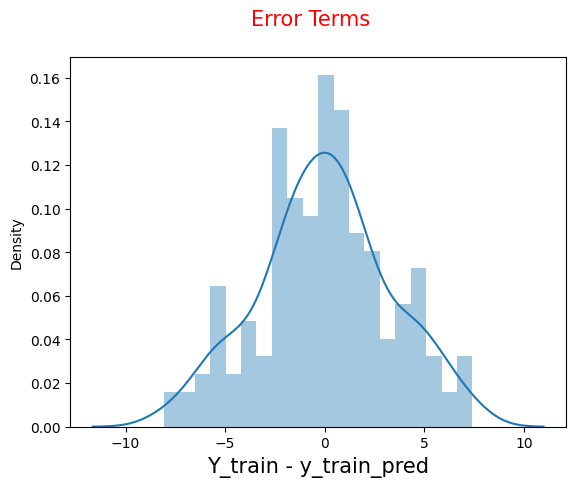

In [38]:
fig = plt.figure()
sns.distplot(res, bins = 20)
fig.suptitle('Error Terms', fontsize = 15,color="red")
plt.xlabel('Y_train - y_train_pred', fontsize = 15)
plt.show()



> The residuals are following the normally distributed with a mean 0. That is good.


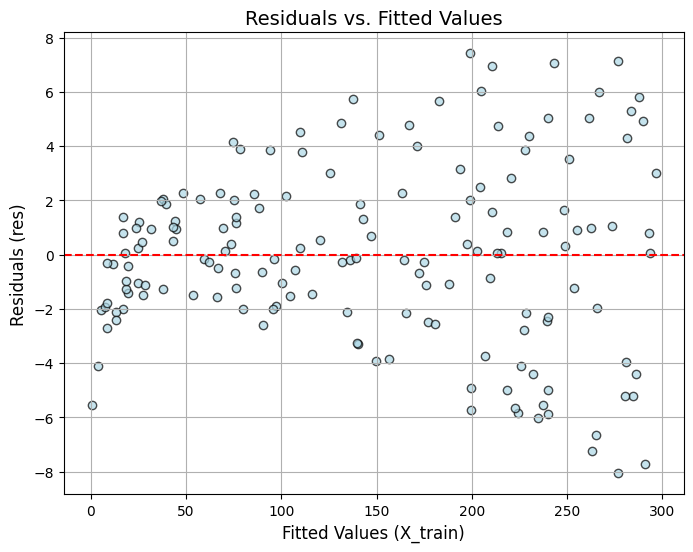

In [37]:
plt.figure(figsize=(8, 6))
plt.scatter(X_train, res, color='lightblue', edgecolor='black', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs. Fitted Values', fontsize=14)
plt.xlabel('Fitted Values (X_train)', fontsize=12)
plt.ylabel('Residuals (res)', fontsize=12)
plt.grid(True)
plt.show()



> We are certain that the model fits well and has some predictive ability. The residual terms' normality permits different inferences about the coefficients.
Nonetheless, there appears to be major variation that this model is unable to account for, as indicated by the variance of residuals expanding with X.



**Prections on the test sets**

> It's time to create some predictions using the test data now that you have fitted a regression line on your train dataset. To use the predict attribute of the fitted regression line to predict the y values corresponding to X_test, you must first add a constant to the X_test data, just as you did for X_train.



In [39]:
# Adding constant to the X_test
X_test_sm = sm.add_constant(X_test)


# Then Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

In [40]:
y_pred.head()

,0
126,7.472664
104,18.096352
99,13.347047
92,17.151102
111,18.257736


**RMSE**

In [41]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(Y_test, y_pred))

3.11240574923818



> The average magnitude of the prediction errors generated by your model is displayed by the RMSE (Root Mean Squared Error) value of 3.1124. It shows that there is an average 3.1124 unit variance in the forecasts made by the model and the actual data. Better performance of models is typically indicated by lower RMSE values.

